In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Initial Prep

In [2]:
#change path if necessary
coupon = pd.read_csv("in-vehicle-coupon-recommendation.csv")
coupon.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [3]:
#rename columns for clarity
coupon = coupon.rename(columns={'passanger': 'passenger'})

In [4]:
#check for duplicated rows
coupon.duplicated().sum()

74

In [5]:
#rows with duplicate entries
coupon[coupon.duplicated()] 

destination passenger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalStatus  ...  CoffeeHouse CarryAway  \
4192         1d    Male  26           Single  ...        never       1~3   
4236         1d    Male  26           Single  ...          gt8       gt8   
4280         1d  Female  26           Single  ...        never       4~8   
4324         1d  Female  46           Single  ...        never       4~8   
4409         1d  Female  21           Single  ...        never     less1   
...         ...     ...  ..              ...  ...          ...       ...   
8511         2h    Male  46  Married partner  ...          1~3       1~3   
8512         2h    Male  46  Married partner  ...          1~3       1~3   
8513         2h    Male  46  Married partner  ...          1~3       1~3   
8515         1d    Male  46  Married partner  ...          1~3       1~3   
8516         1d    Male  46  Married partner  ...          1~3       1~3   

     RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
4192                less1            less1                1                 1   
4236                  4~8            less1                1                 1   
4280                  1~3            less1                1                 1   
4324                  1~3              1~3                1                 1   
4409                  1~3            never                1                 1   
...                   ...              ...              ...               ...   
8511                less1              1~3                1                 0   
8512                less1              1~3                1                 1   
8513                less1              1~3                1                 1   
8515                less1              1~3                1                 1   
8516                less1              1~3                1                 0   

     toCoupon_GEQ25min direction_same direction_opp  Y  
4192                 1              0             1  1  
4236                 1              0             1  1  
4280                 1              0             1  1  
4324                 1              0             1  1  
4409                 1              0             1  0  
...                ...            ...           ... ..  
8511                 0              1             0  1  
8512                 0              0             1  1  
8513                 1              0             1  0  
8515                 1              0             1  0  
8516                 0              1             0  1  

[74 rows x 26 columns]

In [6]:
#drop duplicates
coupon = coupon.drop_duplicates()
coupon.duplicated().sum()

0

In [7]:
#check for null values
coupon.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
#descriptive statistics for numerical variables
coupon.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12610.000000  12610.000000           12610.0       12610.000000   
mean      63.267248      0.414512               1.0           0.559794   
std       19.153386      0.492657               0.0           0.496432   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12610.000000    12610.000000   12610.000000  12610.000000  
mean            0.116019        0.215543       0.784457      0.567565  
std             0.320260        0.411215       0.411215      0.495434  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [9]:
#drop high missing value columns and unnecessary/redundant columns
#car: many missing values
#direction_opp: redundant with direction_same column
#toCoupon_GEQ5min: has STD of 0, all values are 1
coupon = coupon.drop(columns = ['car', 'direction_opp', 'toCoupon_GEQ5min'])

In [10]:
coupon.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
Y                        int64
dtype: object

In [11]:
#convert object type variables to categorical
for col in coupon.select_dtypes(include='object').columns:
    coupon[col] = coupon[col].astype('category')

#convert temperature (already pre-bucked in data) into clearer categories
coupon['temperature'] = coupon['temperature'].map({
    30: 'Cold',
    55: 'Cool',
    80: 'Warm'
})

#convert temperature to categorical type
coupon['temperature'] = coupon['temperature'].astype('category')

#updated data types
coupon.dtypes

destination             category
passenger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
Y                          int64
dtype: object

In [12]:
#!pip install dython
#from dython.nominal import associations

#fig, ax = plt.subplots(figsize=(20, 15))
#associations(coupon, nom_nom_assoc='cramer', ax=ax)

# Data Preprocessing

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

#drop occupation for the model - too many categories
X = coupon.drop(columns=['Y', 'occupation'])
y = coupon['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imputing Missing Values 

In [14]:
#Use Simple Imputer to fill missing values
from sklearn.impute import SimpleImputer

#Frequency variables
freq_cols = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]

#Impute frequency columns (have NA values) with most frequent categories for X_train and X_test
imputer = SimpleImputer(strategy="most_frequent")
X_train[freq_cols] = imputer.fit_transform(X_train[freq_cols])
X_test[freq_cols] = imputer.transform(X_test[freq_cols])

## Encoding Categorical Features

In [15]:
#Use ordinal encoding for frequency variables, age, and income which have natural order/ranking
from sklearn.preprocessing import OrdinalEncoder

#Category orders
freq_order = ["never", "less1", "1~3", "4~8", "gt8"]
age_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
income_order = [
    "Less than $12500", "$12500 - $24999", "$25000 - $37499",
    "$37500 - $49999", "$50000 - $62499", "$62500 - $74999",
    "$75000 - $87499", "$87500 - $99999", "$100000 or More"
]

#Columns to encode
ordinal_cols = ["age", "income"] + freq_cols

#Initialize encoder
ordinal_encoder = OrdinalEncoder(categories=[age_order, income_order] + [freq_order]*len(freq_cols))

#Fit on X_train
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols]).astype(int)

#Transform X_test
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols]).astype(int)

In [16]:
#use One Hot Encoding for the remaining nominal categorical variables
from sklearn.preprocessing import OneHotEncoder

#Nominal variables to encode
nominal_cols = ["temperature", "destination", "passenger", "weather", "time", 
                "coupon", "expiration", "maritalStatus", "gender", "education"]

#Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

#Fit on training and transform train and test data
X_train_ohe = ohe.fit_transform(X_train[nominal_cols]).astype(int)
X_test_ohe = ohe.transform(X_test[nominal_cols]).astype(int)

#Convert to DataFrames with proper column names
ohe_cols = ohe.get_feature_names_out(nominal_cols)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

In [17]:
#Drop original column names and join encoded columns
X_train_final = X_train.drop(columns=nominal_cols).join(X_train_ohe)
X_test_final = X_test.drop(columns=nominal_cols).join(X_test_ohe)

In [18]:
X_train_final.describe()

age  has_children        income           Bar   CoffeeHouse  \
count  10088.000000  10088.000000  10088.000000  10088.000000  10088.000000   
mean       3.260607      0.416039      3.734239      1.021610      1.563045   
std        2.130934      0.492925      2.545677      1.094489      1.238565   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      2.000000      0.000000      1.000000   
50%        3.000000      0.000000      3.000000      1.000000      1.000000   
75%        5.000000      1.000000      6.000000      2.000000      2.000000   
max        7.000000      1.000000      8.000000      4.000000      4.000000   

          CarryAway  RestaurantLessThan20  Restaurant20To50  \
count  10088.000000          10088.000000      10088.000000   
mean       2.417922              2.283803          1.269231   
std        0.921852              0.921230          0.881767   
min        0.000000              0.000000          0.000000   
25%        2.000000              2.000000          1.000000   
50%        2.000000              2.000000          1.000000   
75%        3.000000              3.000000          2.000000   
max        4.000000              4.000000          4.000000   

       toCoupon_GEQ15min  toCoupon_GEQ25min  ...  \
count       10088.000000       10088.000000  ...   
mean            0.557395           0.116772  ...   
std             0.496720           0.321165  ...   
min             0.000000           0.000000  ...   
25%             0.000000           0.000000  ...   
50%             1.000000           0.000000  ...   
75%             1.000000           0.000000  ...   
max             1.000000           1.000000  ...   

       maritalStatus_Married partner  maritalStatus_Single  \
count                   10088.000000          10088.000000   
mean                        0.402954              0.374603   
std                         0.490516              0.484044   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         1.000000              1.000000   
max                         1.000000              1.000000   

       maritalStatus_Unmarried partner  maritalStatus_Widowed   gender_Male  \
count                     10088.000000           10088.000000  10088.000000   
mean                          0.169707               0.010508      0.483941   
std                           0.375393               0.101971      0.499767   
min                           0.000000               0.000000      0.000000   
25%                           0.000000               0.000000      0.000000   
50%                           0.000000               0.000000      0.000000   
75%                           0.000000               0.000000      1.000000   
max                           1.000000               1.000000      1.000000   

       education_Bachelors degree  \
count                10088.000000   
mean                     0.345460   
std                      0.475542   
min                      0.000000   
25%                      0.000000   
50%                      0.000000   
75%                      1.000000   
max                      1.000000   

       education_Graduate degree (Masters or Doctorate)  \
count                                      10088.000000   
mean                                           0.144132   
std                                            0.351241   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       education_High School Graduate  education_Some High School  \
count                    10088.000000                10088.00

In [19]:
#rename columns to remove '<' symbol (prevent errors later)
X_train_final = X_train_final.rename(columns={
    "coupon_Restaurant(<20)": "coupon_Restaurant_lt_20"
})

X_test_final = X_test_final.rename(columns={
    "coupon_Restaurant(<20)": "coupon_Restaurant_lt_20"
})

# Model Building

## Neural Network - Base

In [38]:
X_train_nn = X_train_final.values
X_test_nn = X_test_final.values

# y_train and y_test are already numpy arrays
y_train_nn = y_train
y_test_nn = y_test

feature_names = X_train_final.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

# Overwrite for convenience so later code still works
X_train_nn = X_train_nn_scaled
X_test_nn = X_test_nn_scaled

print("X_train_nn:", X_train_nn.shape)
print("X_test_nn:", X_test_nn.shape)

X_train_nn: (10088, 39)
X_test_nn: (2522, 39)


In [41]:
from sklearn.neural_network import MLPClassifier

# Base (simpler) neural network
base_nn = MLPClassifier(
    hidden_layer_sizes=(32,),     # one hidden layer, 32 neurons
    activation="relu",
    solver="adam",
    random_state=0,
    max_iter=500
)

base_nn.fit(X_train_nn, y_train_nn)

# Base accuracy
base_train_acc = base_nn.score(X_train_nn, y_train_nn)
base_test_acc  = base_nn.score(X_test_nn, y_test_nn)

print(f"Neural Network Train Accuracy: {base_train_acc:.4f}")
print(f"Neural Network Test Accuracy:  {base_test_acc:.4f}")

Neural Network Train Accuracy: 0.8042
Neural Network Test Accuracy:  0.7010


## Tuned Neural Network

In [56]:
from sklearn.neural_network import MLPClassifier

# Tuned neural network (smaller, stronger regularization, early stopping)
tuned_nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # smaller network
    activation="relu",
    solver="adam",
    alpha=0.005,                    # stronger L2 regularization
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=0,
    early_stopping=True,           # stop when validation score stops improving
    validation_fraction=0.15,
    n_iter_no_change=20
)

tuned_nn.fit(X_train_nn, y_train_nn)

tuned_train_acc = tuned_nn.score(X_train_nn, y_train_nn)
tuned_test_acc  = tuned_nn.score(X_test_nn, y_test_nn)

print(f"Tuned NN - Train Accuracy: {tuned_train_acc:.4f}")
print(f"Tuned NN - Test Accuracy:  {tuned_test_acc:.4f}")

Tuned NN - Train Accuracy: 0.8013
Tuned NN - Test Accuracy:  0.7098


## Evaluating Tuned Neural Network

In [59]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    accuracy_score
)

# Use tuned_nn as the final model
y_pred_nn = tuned_nn.predict(X_test_nn)
y_prob_nn = tuned_nn.predict_proba(X_test_nn)[:, 1]

test_acc_nn = accuracy_score(y_test_nn, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test_nn, y_prob_nn)

print(f"Final Tuned NN - Test Accuracy: {test_acc_nn:.4f}")
print(f"Final Tuned NN - ROC AUC:      {roc_auc_nn:.4f}")

Final Tuned NN - Test Accuracy: 0.7098
Final Tuned NN - ROC AUC:      0.7715


### Confusion Matrix

Confusion Matrix (Tuned NN):
 [[ 689  417]
 [ 315 1101]]


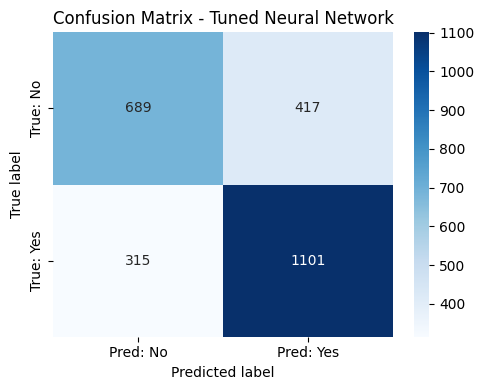


Classification Report (Tuned NN):
              precision    recall  f1-score   support

          No       0.69      0.62      0.65      1106
         Yes       0.73      0.78      0.75      1416

    accuracy                           0.71      2522
   macro avg       0.71      0.70      0.70      2522
weighted avg       0.71      0.71      0.71      2522



In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
print("Confusion Matrix (Tuned NN):\n", cm_nn)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_nn, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Pred: No", "Pred: Yes"],
    yticklabels=["True: No", "True: Yes"]
)
plt.title("Confusion Matrix - Tuned Neural Network")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

print("\nClassification Report (Tuned NN):")
print(classification_report(y_test_nn, y_pred_nn, target_names=["No", "Yes"]))

### ROC Curve and AUC

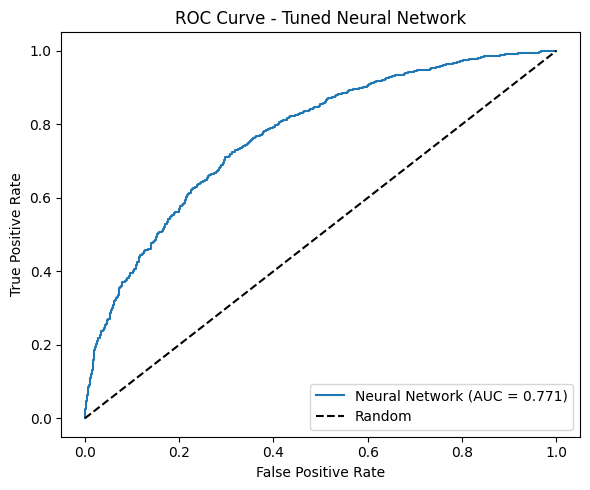

In [65]:
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_prob_nn)

plt.figure(figsize=(6, 5))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Neural Network")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

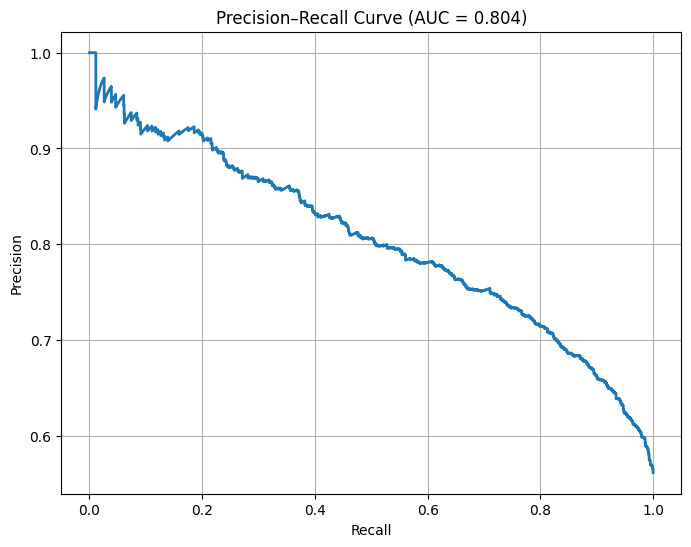

In [92]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Probabilities for the positive class (coupon accepted = 1)
y_prob_nn = tuned_nn.predict_proba(X_test_nn)[:, 1]

# Compute precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_nn)

# Compute AUPRC (Area Under Precision–Recall Curve)
avg_precision = average_precision_score(y_test, y_prob_nn)

# Plot the Precision–Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AUC = {avg_precision:.3f})")
plt.grid(True)
plt.show()

### Neural Network Feature Importance

In [68]:
import pandas as pd
import numpy as np

# First layer weight matrix: shape (n_features, n_hidden_units)
first_layer_weights = tuned_nn.coefs_[0]

# Importance = mean absolute weight across hidden units
importance_scores = np.mean(np.abs(first_layer_weights), axis=1)

importance_nn = pd.DataFrame({
    "feature": feature_names,
    "importance": importance_scores
}).sort_values("importance", ascending=False)

top10_nn = importance_nn.head(10)
top10_nn

feature  importance
4                    CoffeeHouse    0.205173
25           coupon_Coffee House    0.198080
3                            Bar    0.187800
28                 expiration_2h    0.162612
27       coupon_Restaurant_lt_20    0.161360
34    education_Bachelors degree    0.157603
2                         income    0.154467
24  coupon_Carry out & Take away    0.152132
26      coupon_Restaurant(20-50)    0.148618
30          maritalStatus_Single    0.147347

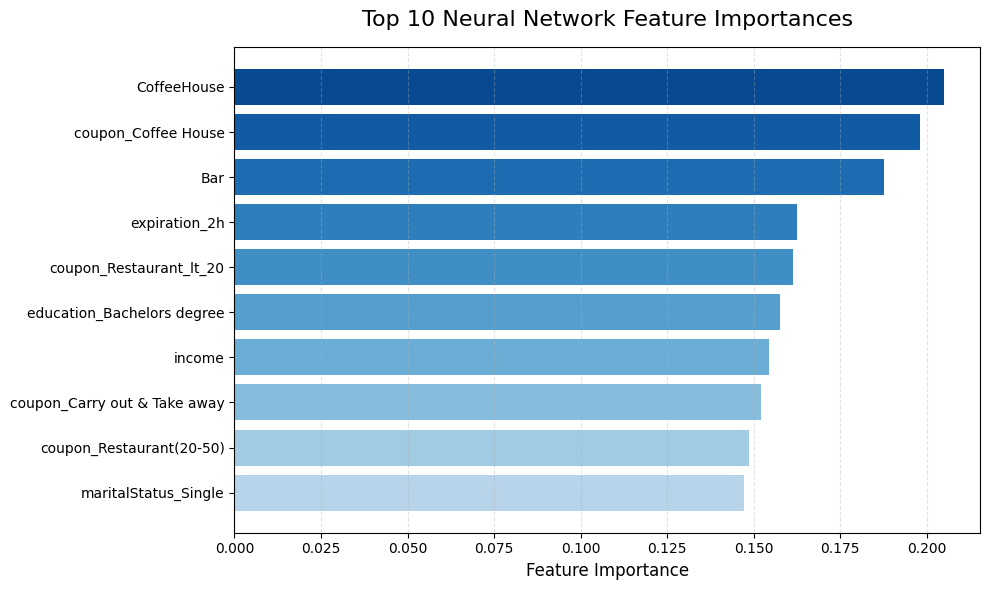

In [80]:
import matplotlib.cm as cm

# Sort lowest → highest for barh orientation
top10_plot = top10_nn.sort_values("importance", ascending=True)

# Gradient colors
colors = cm.Blues(np.linspace(0.3, 0.9, len(top10_plot)))

plt.figure(figsize=(10, 6))
plt.barh(
    top10_plot["feature"],
    top10_plot["importance"],
    color=colors,            # gradient
    edgecolor="none"         # removes borders
)

plt.title("Top 10 Neural Network Feature Importances", fontsize=16, pad=15)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

# Benchmark Table

In [74]:
results = pd.DataFrame([
    {
        "Model": "Tuned XGBoost",
        "Accuracy": 0.72,   # <-- replace with real XGBoost test accuracy
        "ROC_AUC": 0.781    # <-- replace with real XGBoost AUC
    },
    {
        "Model": "Tuned Neural Network (MLP)",
        "Accuracy": float(test_acc_nn),
        "ROC_AUC": float(roc_auc_nn)
    }
])

results

Model  Accuracy   ROC_AUC
0               Tuned XGBoost  0.720000  0.781000
1  Tuned Neural Network (MLP)  0.709754  0.771477